##Credit card transaction fraud detection - InfoAid Tech
###Task3

### Basic Libraries import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the dataset

In [ ]:
df = pd.read_csv("creditcard.csv")

### Number of rows and columns

In [ ]:
print('Total Rows and Columns: \n\n' , df.shape,'\n')

Total Rows and Columns: 

 (284807, 31) 



### Verification of the existence of null or missing values

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Variable type in each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Statistical information about the variables

In [ ]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,...,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,...,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


### Statistical information in each class

In [ ]:
print ('Not Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 1].describe(),2))

Not Fraud %  99.83

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64


Fraud %     0.17

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


*The average value of fraud transactions is 122.21 and for normal transactions, 88.29.

### Comparing the amount value of normal transactions versus fraud

Non Fraud %  99.83
Fraud %     0.17


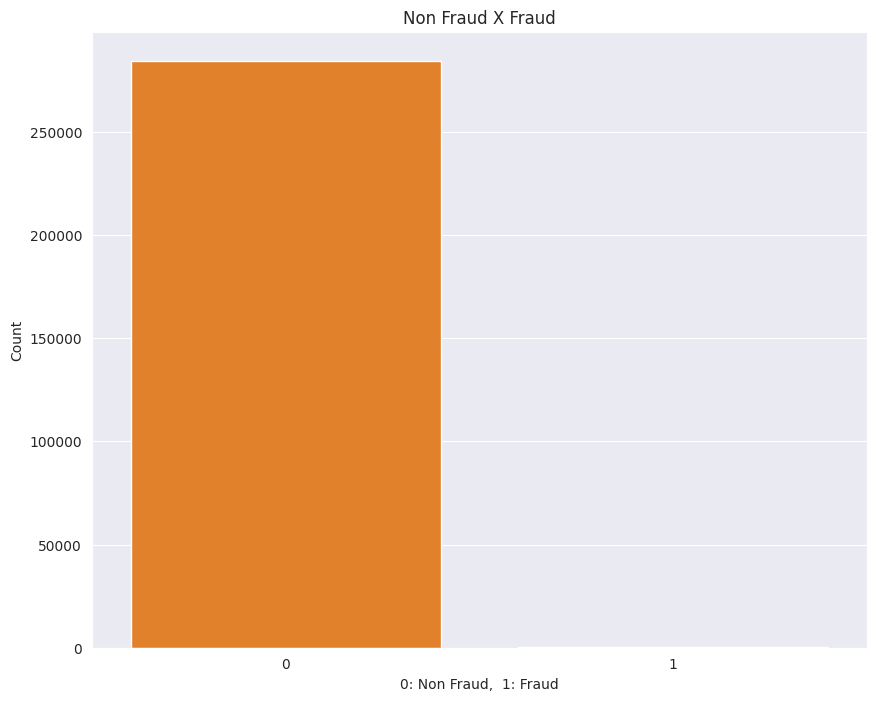

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(), palette=["C1", "C8"])
plt.title('Non Fraud X Fraud')
plt.ylabel('Count')
plt.xlabel('0: Non Fraud,  1: Fraud')
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2));

We can see the total of 284,807 transactions, 284,315 were labeled as normal (99.83%), and only 492 transactions were labeled as fraud (0.17%). Although it may seem small, each fraud transaction can represent a very significant expense, which together can represent billions of dollars of lost revenue each year.

### Separation of input variables from target variable

In [ ]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df[target]

In [ ]:

feature_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
target

Index(['Class'], dtype='object')

With the dataset defined, separating the input variables from the target variable, we divided the data into training and test sets, importing the train_test_split function.

The train_test_split function uses a randomizer to separate data into training and test sets. In this case, 70% of the data for training and 30% for tests were defined.

The random seed (np.random.seed) is used to ensure that the same data is used for all runs.

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target,
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

### Building the Regression Logistic model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

### Training the model

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

### Confusion Matrix - Model performance measures

In [ ]:

def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [ ]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

### Classification Report - Model performance measures

In [ ]:
!pip install scikit-plot
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

In [ ]:
cmat, pred = RunModel(lr, X_train, y_train, X_test, y_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

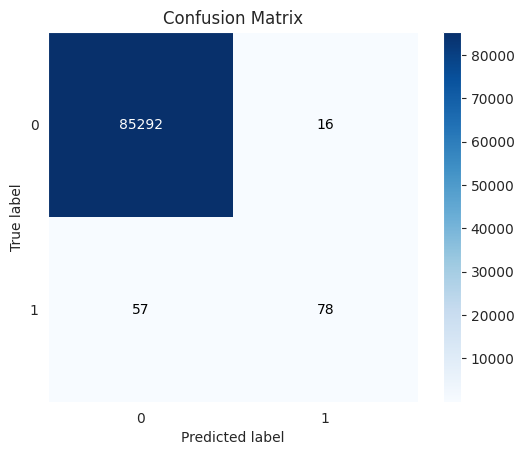

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred)

0.9991456292499094

In [ ]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.83      0.58      0.68       135

    accuracy                           1.00     85443
   macro avg       0.91      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443



With the Logistic Regression Model, we have:

85290 transactions classified as normal and were actually normal;

18 transactions classified as fraud but that were really normal (type 1 error);

61 transactions classified as normal but which were fraud (type 2 error);

74 transactions classified as fraud and were actually fraud.

Thus, although the accuracy was excellent, the algorithm wrongly classified about 4 out of 10 fraudulent transactions.

Accuracy in a highly unbalanced data set does not represent a correct value for the efficiency of a model.

Initially, a method should be applied to balance the data before taking into account any performance evaluation metrics.

** Accuracy in a highly unbalanced data set does not represent a correct value for the efficiency of a model. Initially, a method should be applied to balance the data before taking into account any performance evaluation metrics.

### Undersampling and Oversampling - Working with unbalanced data

### Applying the undersampling technique

In [ ]:
# The function "len" counts the number of classes = 1 and saves it as an object "fraud_records"
fraud_records = len(df[df.Class == 1])

# Defines the index for fraud and non-fraud in the lines:
fraud_indices = df[df.Class == 1].index
not_fraud_indices = df[df.Class == 0].index

# Randomly collect equal samples of each type:
under_sample_indices = np.random.choice(not_fraud_indices, fraud_records, False)
df_undersampled = df.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:30]
Y_undersampled = df_undersampled.Class
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

### Using the "new" classifier for balanced data

In [ ]:
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

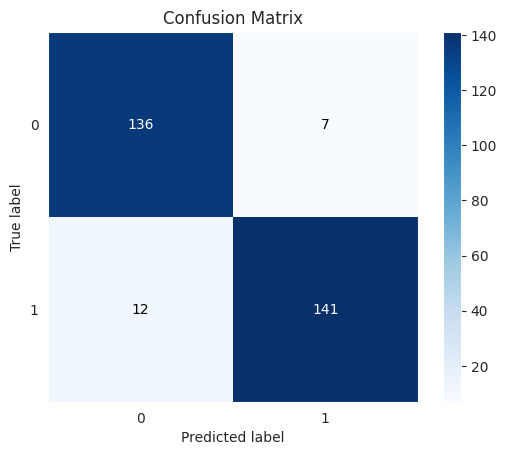

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [ ]:
accuracy_score(Y_undersampled_test, pred)

0.9358108108108109

In [ ]:
print (classification_report(Y_undersampled_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       143
           1       0.95      0.92      0.94       153

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



### Using the "new" classifier for the original data test

In [ ]:
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

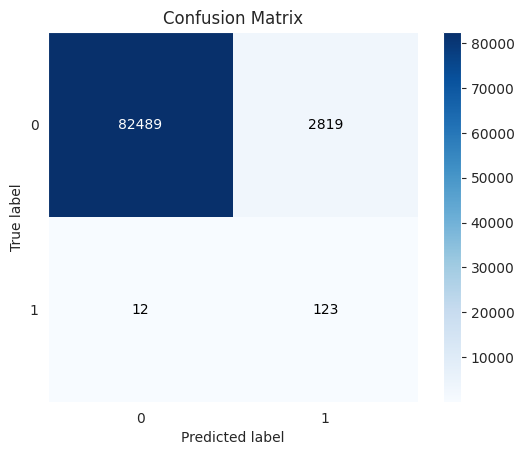

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred)

0.9668668000889482

In [ ]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85308
           1       0.04      0.91      0.08       135

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443



### GridSearchCV - Parameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [1,2,3,4,5,6,7,8,9,10],
              "penalty": ['l1','l2']} #Parameters

grid_search = GridSearchCV(lr, param_grid, scoring="precision") #score
grid_search.fit(y_test, pred)

lr = grid_search.best_estimator_
grid_search.best_params_, grid_search.best_score_

({'C': 1, 'penalty': 'l2'}, 0.9128655452493535)

### Application of the Model with balanced data and parameter optimization

In [ ]:
lr_undersampled = LogisticRegression(C=1, penalty='l2')
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

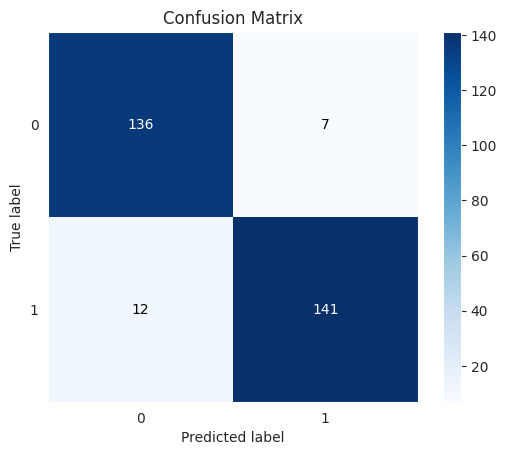

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [ ]:
accuracy_score(Y_undersampled_test, pred)

0.9358108108108109

In [ ]:
print (classification_report(Y_undersampled_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       143
           1       0.95      0.92      0.94       153

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



### Application of the Model to the original data test

In [ ]:
lr = LogisticRegression(C=1, penalty='l2')
cmat, pred = RunModel(lr, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

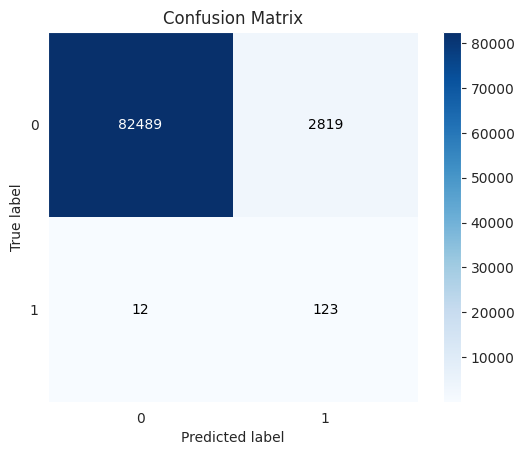

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred)

0.9668668000889482

In [ ]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85308
           1       0.04      0.91      0.08       135

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443



### Measurement of classifier performance through the ROC and AUC curve

In [ ]:
from sklearn import metrics

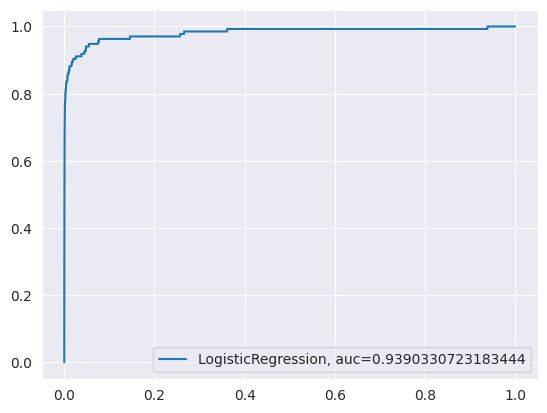

In [ ]:
clf = LogisticRegression(C=1, penalty='l2')
clf.fit(X_undersampled_train, Y_undersampled_train)
y_pred = clf.predict(X_test)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The classifier had a good result, with AUC of 0.94!

### Conclusion

We reached a very satisfactory number in detecting fraud transactions in relation to the initial model, rising from 55% to 91% of correctly identified transactions. In return, the detection of correctly identified normal transactions decreased from 99% to 97%.

Remember that we need to determine where this exchange is worthwhile. Generally, the costs of losing a fraudulent transaction are often greater than mistakenly classifying a good transaction as fraud. One of the challenges is to find the balance in training your model and proceed accordingly.

As a way to further improve the performance of the model, there are several ways to explore the input variables, performing some techniques of "Data Pre-Processing" and "Feature Engineering".

![image.png](attachment:image.png)